# Preprocessament del dataset "Heart Attack Analysis & Dataset"
En aquest document fem les fases de selecció, integració i neteja de les dades. L'anàlisi
i la presentació de resultats es farà en altres documents.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Descripció, integració i selecció de les dades
El joc de dades està composat per dos fitxers csv:

    - heart.csv
    - o2Saturation.csv
    
Es poden descarregar de [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download).

Aquests dos fitxers csv contindran variables diferents que es correspondran a mesures preses a pacients que estan en ingres intrahospitalari. L'objectiu d'aquesta pràctica es donar resposta a la pregunta de quins paràmetres fan que un pacient tingui major probabilitat de patir un atac de cor. Gràcies a aquest anàlisis es podrà compendre quins factors influeixen augmentan el risc d'atac de cor i en quins rang de valor cal que estiguin situats per prevenir-los. 

In [39]:
data_heart = pd.read_csv('input/heart.csv')
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


El joc de dades està compost per 303 observacions de 14 variables, on totes les variables són de
tipus enter excepte la variable oldpeak, que és de tipus numèric. El significat de cada variable és el següent:

1. age: Edat del pacient.
2. sex: Sexe del pacient.
3. cp: Tipus de dolor de pit, codificat:
    - 1: angina típica.
    - 2: angina atípica.
    - 3: dolor no anginal.
    - 4: asimptomàtic.
4. trtbps: pressió arterial en repos, mesurada en milímetres de mercuri.
5. chol: colesterol en mg/dl.
6. fbs: sucre en sang a dejú major que 120 mg/dl.
7. restecg: resultats de prova electrocardiogràfica en repòs.
    - 0: normal.
    - 1: anormalitat en l'ona ST-T.
    - 2: hipertròfia ventricular esquerra, probable o segura. 
8. thalachh: màxima freqüència cardíaca assolit. 
9. exng: angina induïda per l'exercici, cert o fals.
10. oldpeak: depresió del ST induÏda per el exercici físic en relació al repos (mm).
11. slp: pendent del pic del segment ST d'exercici.
12. caa: número de vassos majors.
13. thall: presencia de talassemia.
    - 0: normal.
    - 1: defecte arreglat.
    - 2: defecte reversible.
14. output: menys probabilitat d'atac de cor (0) o més probabilitat d'atac de cor (1).

In [40]:
data_o2 = pd.read_csv('input/o2Saturation.csv')
data_o2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


El fitxer 02Saturation.csv està compost per 3585 observacions d'una sola variable. En la descripció del
dataset a la web no s'explica quina relació té aquest fitxer amb l'altre, ni tan sols el seu significat.
Per tant decidim no analitzar aquest fitxer, ja que no en podrem extreure conclusions sòlides.

## 2. Neteja de les dades
Com hem vist no hi ha valors nuls com a tals al joc de dades, però aquests podrien estar codificats en algun
valor específic no nul. No s'especifica a la descripció del dataset, així que intentem veure-ho amb histogrames.

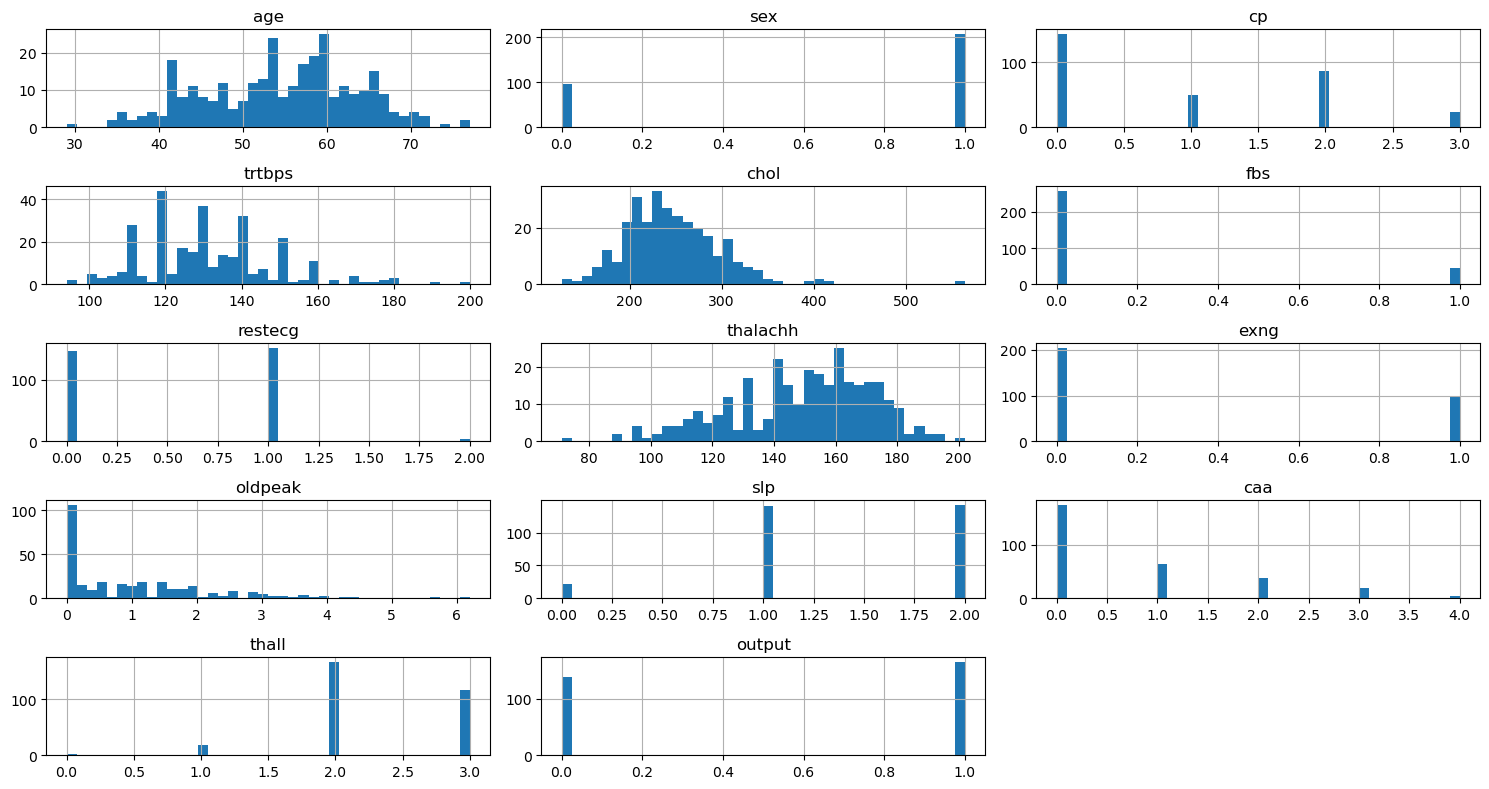

In [32]:
data_heart.hist(bins=40, layout=(5, 3), figsize=(15, 8))
plt.tight_layout()
plt.show()

No s'observen irregularitats en les dades que indiquin manca de qualitat en aquestes. Sí que podem
observar, però, que tot i que la majoria de les variables són de tipus enter, de fet podem dividir-les
entre categòriques i numèriques segons el codi de la cel·la següent. 

In [33]:
num_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_vars = [v for v in data_heart.columns if v not in num_vars]

Podem veure també com la majoria de les variables
categòriques estan desequilibrades. Finalment, veiem la classe oldpeak presenta una concentració d'observacions al zero.

Procedim a analitzar la presència de valors extrems en les diferents variables numèriques. Per fer aquest estudi, s'implementaràn diagrames de caixes el qual ens permetran detectar aquelles observacions que es troben molt allunyades de la resta.

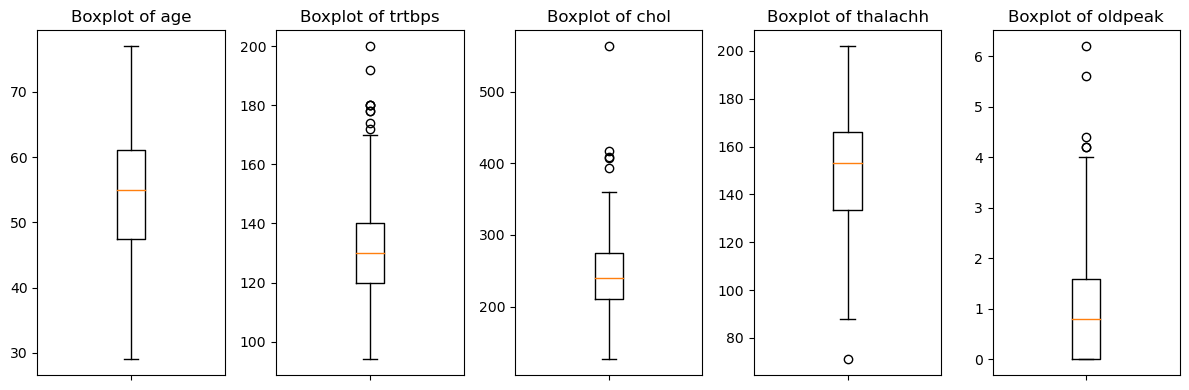

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))

for position, column_name in enumerate(num_vars):
    axes[position].boxplot(data_heart[column_name])
    axes[position].set_title('Boxplot of {}'.format(column_name))
    axes[position].set_xticklabels([]) 

plt.tight_layout()
plt.show()

Es pot observar que es detecten valors atípics a les variables "trtbps", "chol", "thalachh" i oldpeack.

A continuació  determinaré si es tracta d'un valor extrem:

+ **"Chol"**:
    
    Els cuatre valors atípics detectats de colesterol no seràn extrems. Ja que segons aquest article  [article](https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806) un valor de colesterol superior als 400 mg/dl és considera hipercolesterolèmia severa. Per tant, els valors atípics que es troben al voltant de 400 encara que es considerin elevats s'han de tenir en compte. Tot i així, el valor al voltant de 500 és considera molt elevat i molt poc habitual, com que es tracta d'una observació aïllada, es pot eliminar del estudi.


+ **"Oldpeak"**:

     Els cuatre valors atípics detectats de oldpeack no seràn extrems. Sabem que oldpeak referencia a la depresió de la ona ST induïda per el exercici fisic que es troba en mm i valors elevats d'aquest són indicadors de cardiopaties isquemicas. Segons el següent [article](https://cerebromedico.com/electrocardiograma/segmento-st/), la depresió d'una ona ST sol situar-se al voltant d'entre 0.5 i 1mm però aquesta pot  [augmentar](https://www.my-ekg.com/como-leer-ekg/segmento-st.html) quan el pacient realitza esforç físic. Per tant, podem considerar que són valors que entren dins del rang.
    
    
+ **"trtbps"**:

    Els sis valors atípics detectats de "trtbps" no seràn extrems. Sabem que trtbps referencia a la presió artesial en repós. Segons el següent [article](https://www.mayoclinic.org/es-es/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410), les presions arterial superiors a és consideren crisis hipertensives, per tant, són valors atípics els que tenim però estan dins del rang de valors possibles. 
    
+ **"thalachh"**: 

    El valor atípic detectats de "thalachh" no serà extrem. Sabem que "thalachh" fa referència a la màxima freqüència cardíaca del pacient. Segons el següent [article](https://www.medicalnewstoday.com/articles/es/291182#conclusion), la freqüencia cardíaca màxima depen directament de la edad i aquesta pot presentar valors menors en pacients que són [esportistes](https://aptavs.com/articulos/frecuencia-cardiaca-deportista) d'elit, per tant el valor atípic entra dins del rang possible.
    


In [35]:
index_chol_over_500 = data_heart.loc[data_heart['chol'] > 500].index
data_heart_clean = data_heart.drop(index_chol_over_500, axis=0)

Finalment, afegim la variable log_oldpeak per estudiar la variable oldpeak de manera més efectiva, i eliminem
la original.

In [36]:
data_heart_clean['log_oldpeak'] = data_heart['oldpeak'].apply(lambda x: np.log(x+1))
data_heart_clean.drop('oldpeak', axis=1, inplace=True)
data_heart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          302 non-null    int64  
 1   sex          302 non-null    int64  
 2   cp           302 non-null    int64  
 3   trtbps       302 non-null    int64  
 4   chol         302 non-null    int64  
 5   fbs          302 non-null    int64  
 6   restecg      302 non-null    int64  
 7   thalachh     302 non-null    int64  
 8   exng         302 non-null    int64  
 9   slp          302 non-null    int64  
 10  caa          302 non-null    int64  
 11  thall        302 non-null    int64  
 12  output       302 non-null    int64  
 13  log_oldpeak  302 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## Dataset resultant
Emmagatzemem les dades de data_heart_clean al fitxer data_heart_clean.csv.

In [37]:
data_heart_clean.to_csv('input/heart_clean.csv', index=False)